In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import expit, logit
import statsmodels.api as sm

In [2]:
df = pd.read_csv("./data/examresults.csv", sep=';')
df

,zeit_invest,bestanden
0,24,1
1,23,1
2,30,1
3,22,0
4,13,0
5,13,1
6,25,1
7,24,1
8,31,1
9,17,0


In [3]:
X = df.fillna(-1).drop("bestanden",axis=1).values
y = df.fillna(-1)["bestanden"].values
X, y

(array([[24],
        [23],
        [30],
        [22],
        [13],
        [13],
        [25],
        [24],
        [31],
        [17],
        [10],
        [19],
        [12],
        [20],
        [15],
        [23],
        [27],
        [18],
        [22],
        [23]], dtype=int64),
 array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1],
       dtype=int64))

In [4]:
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [5]:
#Das Model trainiern
log_modell = LogisticRegression()
log_modell.fit(X_train,y_train)
log_modell.coef_, log_modell.intercept_

(array([[0.25506262]]), array([-4.80017703]))

In [13]:
#Das Model testen
p_pred = log_modell.predict_proba(X_test)
y_pred = log_modell.predict(X_test)
print("Accuracy Score: " + str(log_modell.score(X_test,y_test)))
print("Regeressionskoefficiente=" + str(log_modell.coef_) + ", constant=" + str(log_modell.intercept_))

Accuracy Score: 1.0
Regeressionskoefficiente=[[0.25506262]], constant=[-4.80017703]


In [134]:
#sns.regplot(x='zeit_invest', y='bestanden', data=df, logistic=True)

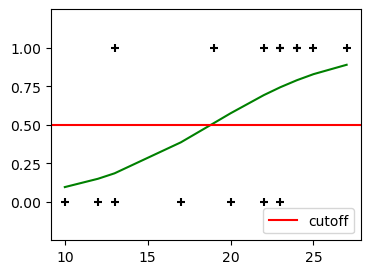

In [7]:
def plot_sigmoid():
    #X_test_modi = np.append(X_test, [[10], [30]], axis=0)
    X_train_sorted = np.sort(X_train, axis=0)
    y_pred_absolut = X_train_sorted*log_modell.coef_ + log_modell.intercept_
    #sigmond kurve
    loss = expit(y_pred_absolut)
    

    plt.figure(1, figsize=(4,3))
    plt.scatter(X_train.ravel(), y_train, color="black", marker='+')
    plt.plot(X_train_sorted, loss.ravel(), c='green')
    #plt.xticks(range(10,30))
    plt.yticks([0,0.25,0.5,0.75,1])
    plt.ylim(-0.25, 1.25)
    plt.axhline(0.5, c="red", label="cutoff")
    plt.legend(loc="lower right")

plot_sigmoid()


In [ ]:
#irrelevant
# logit_model=sm.Logit(y,X)
# result=logit_model.fit()
# print(result.summary())

In [10]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2 0]
 [0 2]]


In [11]:
tp = float(cm[0,0]) / float(cm[0,0] + cm[1,0])
fp = float(cm[1,0]) / float(cm[0,0] + cm[1,0])
tn = float(cm[0,1]) / float(cm[0,1] + cm[1,1])
fn = float(cm[1,1]) / float(cm[1,1] + cm[0,1])
 
print ("True Positive = ", tp)
print ("False Positive = ", fp)
print ("True Negative = ", tn)
print ("False Negative = ", fn)

True Positive =  1.0
False Positive =  0.0
True Negative =  0.0
False Negative =  1.0


In [ ]:
# heatmap?